In [127]:
import pandas as pd

In [128]:
df = pd.read_csv("golf_dataset_long_format.csv")
df.head(20)

,Temperature,Humidity,Wind,Outlook,Play
0,3.3,49,1,3,1
1,3.3,49,1,3,0
2,3.3,49,1,3,0
3,3.3,49,1,3,1
4,3.3,49,1,3,1
5,3.3,49,1,3,0
6,3.3,49,1,3,0
7,2.9,53,0,3,1
8,2.9,53,0,3,0
9,2.9,53,0,3,1


In [129]:
cols = list(df.columns)
print(cols)

['Temperature', 'Humidity', 'Wind', 'Outlook', 'Play']


In [130]:
df.shape

(7665, 5)

In [131]:
corrmat = df.corr()
top_corr_features = corrmat.index
corrmat

,Temperature,Humidity,Wind,Outlook,Play
Temperature,1.000000,0.683181,-0.162446,-0.113775,-0.021652
Humidity,0.683181,1.000000,-0.115711,-0.139317,-0.096551
Wind,-0.162446,-0.115711,1.000000,-0.028279,-0.054290
Outlook,-0.113775,-0.139317,-0.028279,1.000000,0.068390
Play,-0.021652,-0.096551,-0.054290,0.068390,1.000000


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

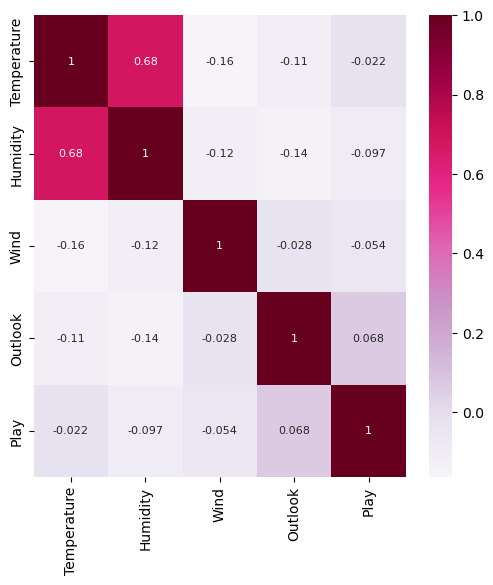

In [133]:
plt.figure(figsize=(6,6))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="PuRd", annot_kws={"fontsize":8})

In [134]:
feature_cols= df.columns.drop(['Play'])
print(feature_cols)

Index(['Temperature', 'Humidity', 'Wind', 'Outlook'], dtype='object')


In [135]:
feature_cols= ['Temperature','Humidity','Wind','Outlook']
print(feature_cols)

['Temperature', 'Humidity', 'Wind', 'Outlook']


In [136]:
X = df[feature_cols]
X.head()

,Temperature,Humidity,Wind,Outlook
0,3.3,49,1,3
1,3.3,49,1,3
2,3.3,49,1,3
3,3.3,49,1,3
4,3.3,49,1,3


In [137]:
y = df.Play
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Play, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [140]:
len(y_train)

5748

In [141]:
len(y_test)

1917

In [142]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "gini", max_depth=4)

In [143]:
model= clf.fit(X_train, y_train)

In [144]:
y_pred = model.predict(X_test)

In [145]:
len(y_pred)

1917

In [146]:
len(y_test)

1917

In [147]:
y = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
y.head()

,Actual,Predicted
1736,0,0
6056,0,0
7651,0,0
4467,1,0
7340,0,0


In [148]:
y.tail()

,Actual,Predicted
2946,0,0
3208,1,0
526,0,0
5331,0,0
4745,0,0


In [149]:
y.sample(10)

,Actual,Predicted
6543,0,0
4951,0,0
3015,0,0
4958,0,0
1452,0,0
593,0,0
5975,0,0
3653,0,0
7035,0,0
4233,0,0


In [150]:
from sklearn import metrics

In [151]:
c_mtrx = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(c_mtrx)

Confusion Matrix
[[1541   10]
 [ 362    4]]


Text(0.5, 1.0, 'Confusion Matrix')

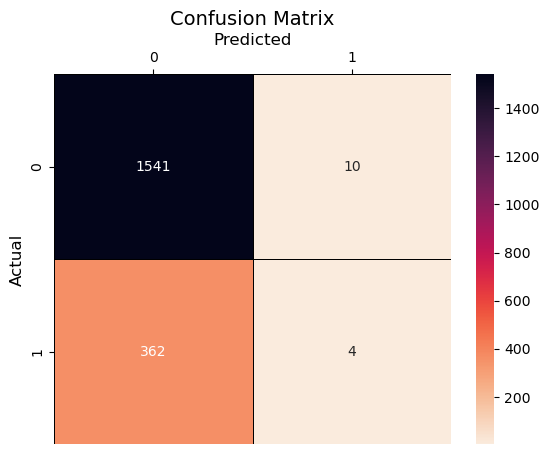

In [152]:
# Create the heatmap
ax = sns.heatmap(c_mtrx, annot=True, fmt='d', cbar=True, cmap="rocket_r", linewidths=.5, linecolor='black')
# fmt='d' for integer format, using a colormap similar to the image

# Set predicted labels on top
ax.xaxis.tick_top() # Move the x-axis ticks (Predicted labels) to the top
ax.xaxis.set_label_position('top') # Move the x-axis label ('Predicted') to the top

# Set the axis labels and title
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

In [153]:
#[row, column]
#(Actual, Predict)
TN = c_mtrx[0, 0]
FP = c_mtrx[0, 1]
FN = c_mtrx[1, 0]
TP = c_mtrx[1, 1]

print("TN: ", TN, "\tFP: ", FP)
print("FN: ", FN, "\tTP: ", TP)

TN:  1541 	FP:  10
FN:  362 	TP:  4


In [47]:
print('Metrics computed from a confusion matrix')
print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
print("Specificity:\t",TN / (TN + FP))
print("Precision:\t", metrics.precision_score(y_test, y_pred))
print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
print("False_Positive_Rate:", 1 - TN / (TN + FP))

Metrics computed from a confusion matrix
Accuracy:	 0.8059467918622848
Sensitivity:	 0.01092896174863388
Specificity:	 0.9935525467440361
Precision:	 0.2857142857142857
Classification Eerror: 0.1940532081377152
False_Positive_Rate: 0.006447453255963853


In [48]:
count0 = df['Play'][df.Play == 0].count()

count1 = df['Play'][df.Play == 1].count()

print("Actual Dataset")
print("0's:",count0)
print("1's:",count1)

Actual Dataset
0's: 6266
1's: 1399


In [49]:
Trcount0 = sum(y_train==0)
Trcount1 = sum(y_train==1)

print("Trained Dataset")
print("0's:",Trcount0)
print("1's:",Trcount1)

Trained Dataset
0's: 4715
1's: 1033


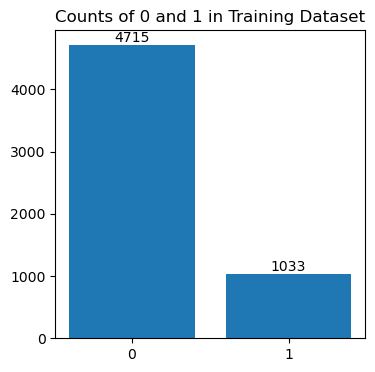

In [50]:
# Plotting the bar chart
labels = ['0', '1']
counts = [Trcount0, Trcount1]
plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Training Dataset')
plt.bar(labels, counts)
# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()

In [51]:
from sklearn import tree

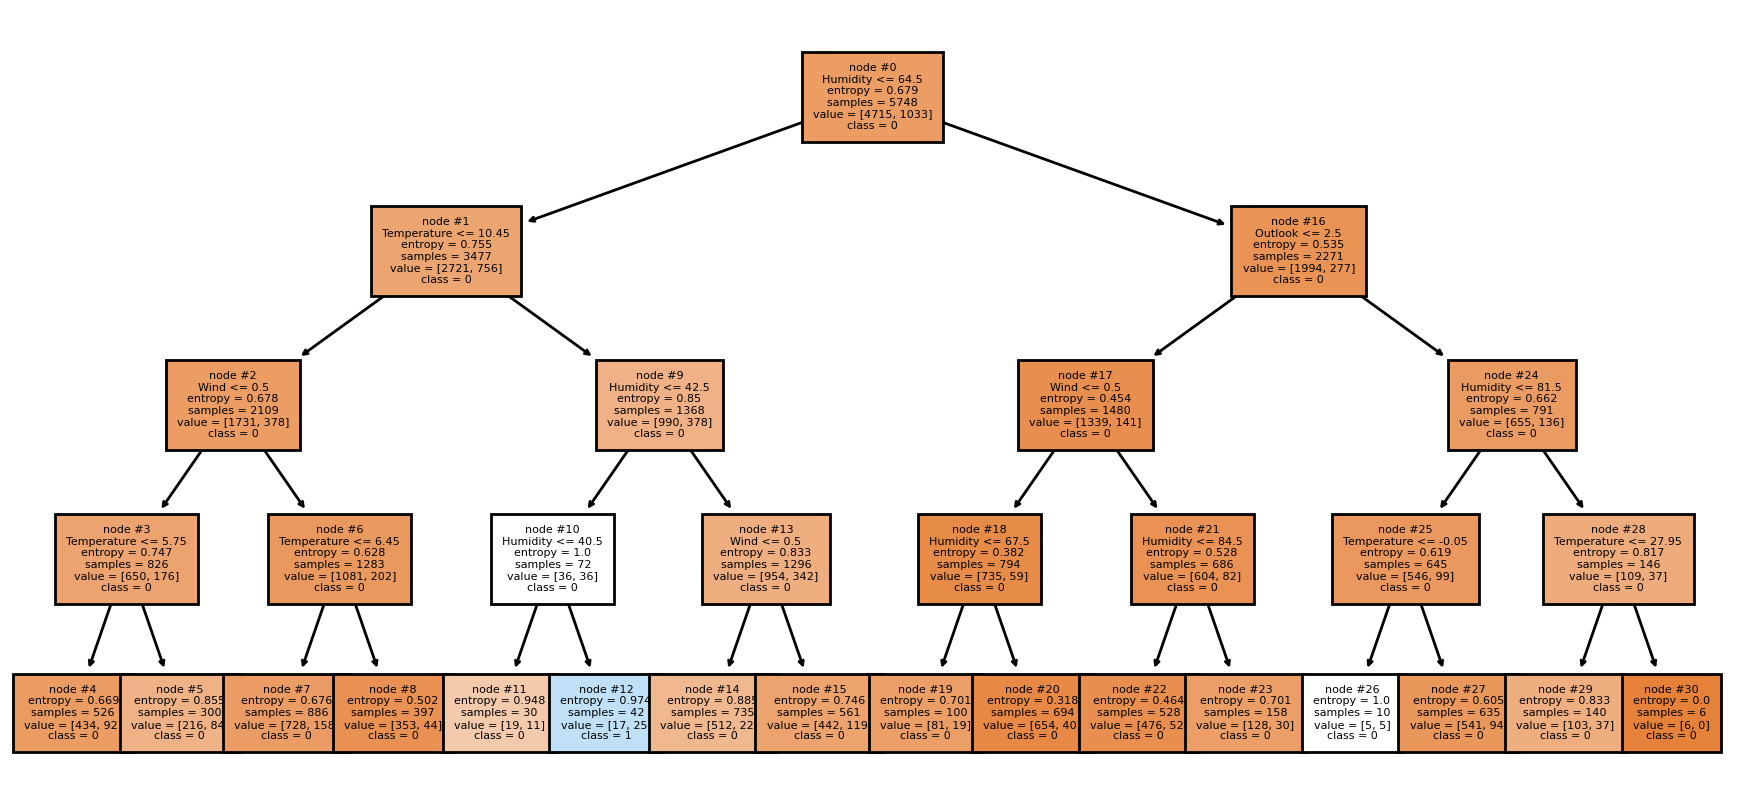

In [52]:
# Plot the decision tree with customizations
plt.figure(figsize=(11, 5), dpi=200)
# plt.title("Decision Tree Visualization")
tree.plot_tree(clf, filled=True, feature_names=list(X_train.columns), class_names=["0","1"],
                                   fontsize=4, max_depth=4, node_ids=True)

plt.show()

In [53]:
text_representation = tree.export_text(clf, feature_names=list(X_train.columns))
print(text_representation)

|--- Humidity <= 64.50
|   |--- Temperature <= 10.45
|   |   |--- Wind <= 0.50
|   |   |   |--- Temperature <= 5.75
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  5.75
|   |   |   |   |--- class: 0
|   |   |--- Wind >  0.50
|   |   |   |--- Temperature <= 6.45
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  6.45
|   |   |   |   |--- class: 0
|   |--- Temperature >  10.45
|   |   |--- Humidity <= 42.50
|   |   |   |--- Humidity <= 40.50
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity >  40.50
|   |   |   |   |--- class: 1
|   |   |--- Humidity >  42.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 0
|--- Humidity >  64.50
|   |--- Outlook <= 2.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Humidity <= 67.50
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity >  67.50
|   |   |   |   |--- class: 0
|   |   |--- Wind >  0.50
|   |   |   |--- Humidity <= 84.50
|   |   |   |   |---